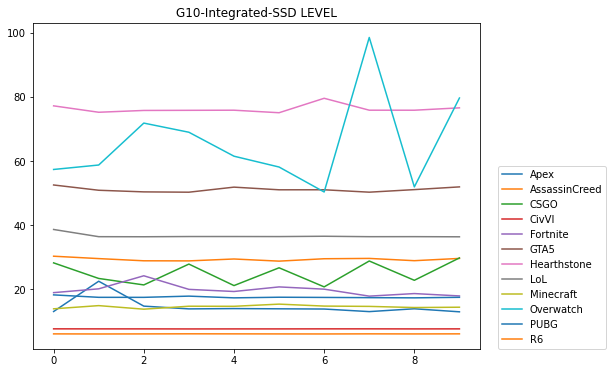

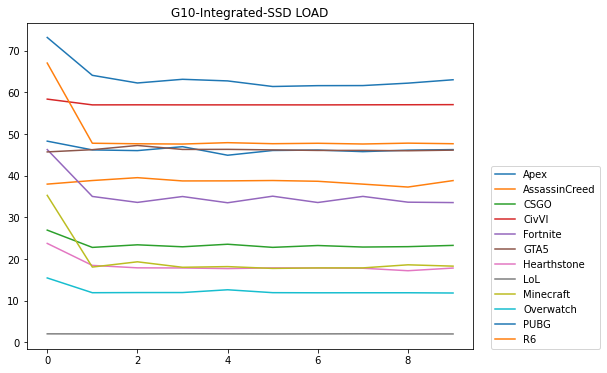

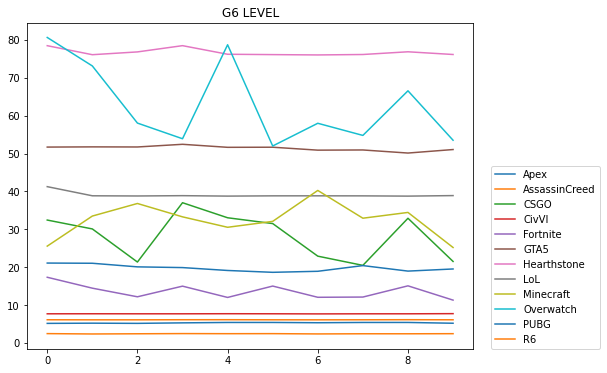

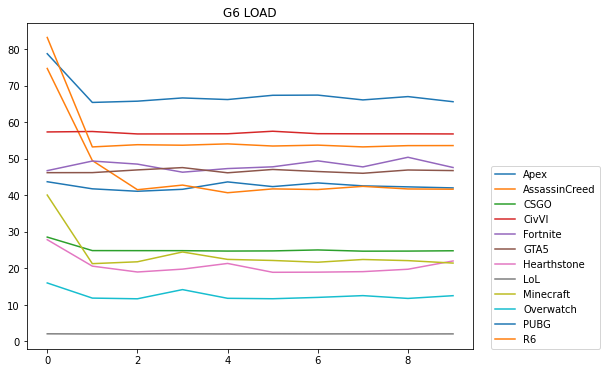

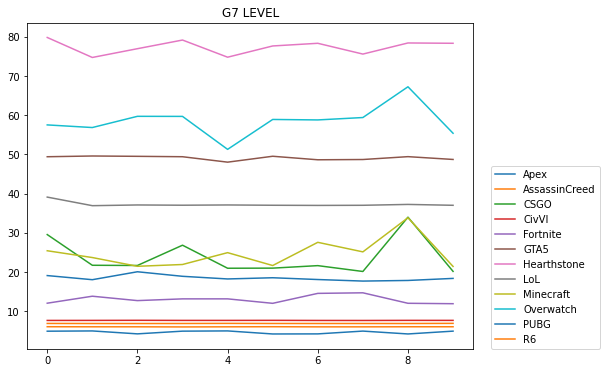

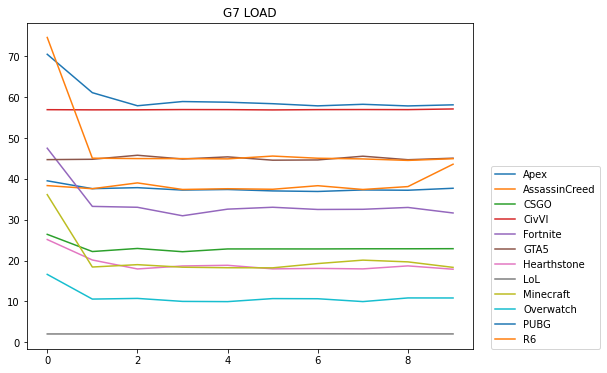

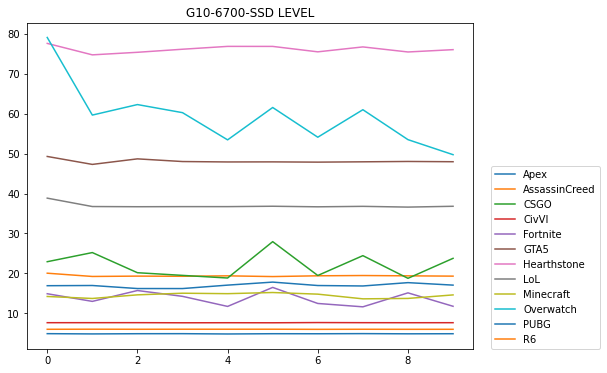

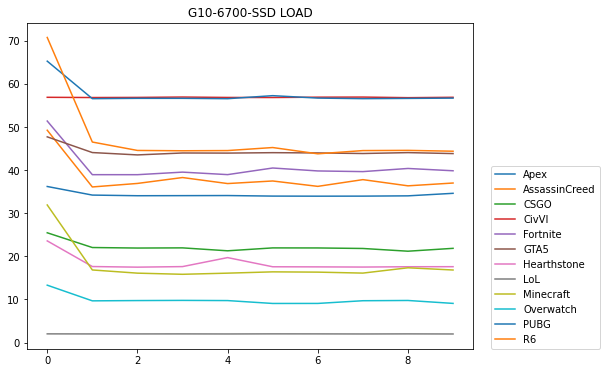

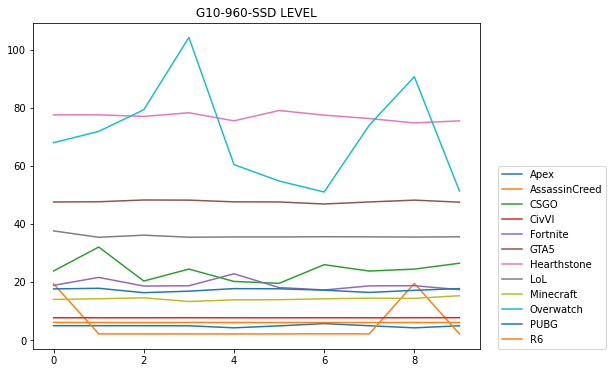

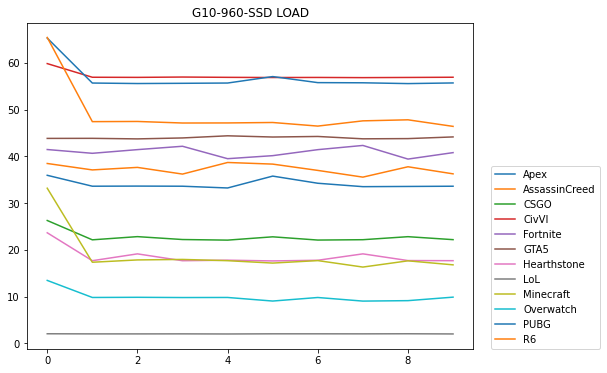

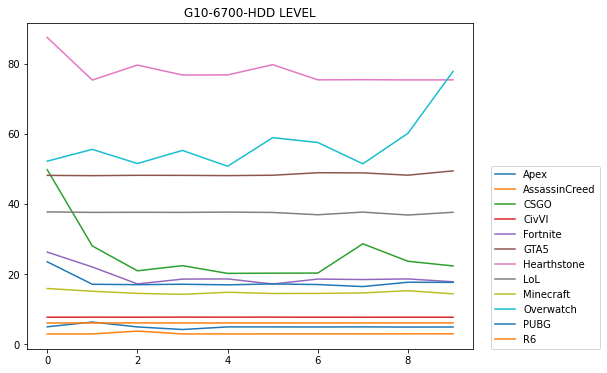

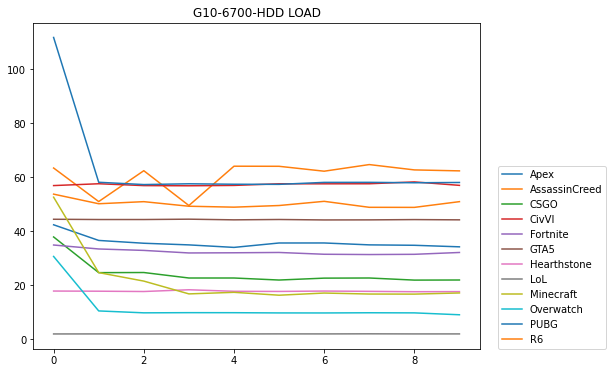

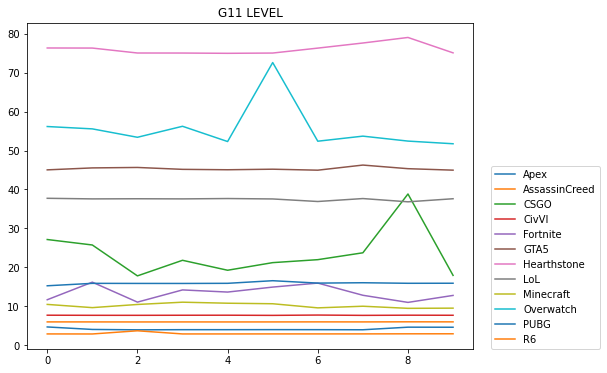

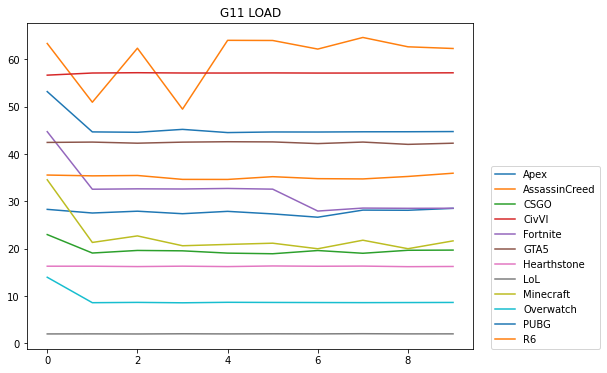

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import glob, os

directory = '../../data/raw'

labels = []
level_means = []
load_means = []
for filename in glob.iglob(f'{directory}/*/'):
    for filename2 in glob.iglob(f'{filename}/*'):
        split = filename2.split("/")
        new = split[-1]
        if new.startswith("metrics") and new.endswith("csv"):
            df = pd.read_csv(filename2)

            labels.append(split[-2])
            
            level_means.append(df['level'].mean())
            load_means.append(df['load'].mean())

            games = df.groupby(['game_name'], as_index = False)
            plt.figure(figsize=(8, 6))
            for game in games:
                data = game[1][['load', 'level', 'iteration']]
                plt.plot(data['iteration'], data['level'], label = game[0])
                plt.title(split[-2] + " LEVEL")
            plt.legend(loc=(1.04,0))
            plt.savefig(split[-2] + " LEVEL")
            plt.show()

            plt.figure(figsize=(8, 6))
            for game in games:
                data = game[1][['load', 'level', 'iteration']]

                plt.plot(data['iteration'], data['load'], label = game[0])
                plt.title(split[-2] + " LOAD")
            plt.legend(loc=(1.04,0))
            plt.savefig(split[-2] + " LOAD")
            plt.show()

        else:
            continue

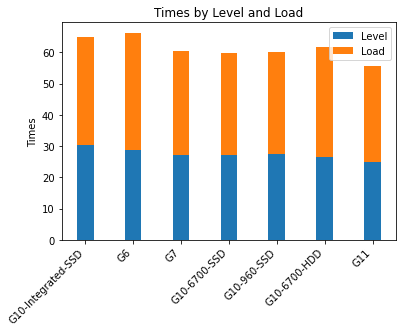

In [11]:
width = 0.35

fig, ax = plt.subplots()

plt.xticks(rotation=45, ha="right")

ax.bar(labels, level_means, width, label='Level')
ax.bar(labels, load_means, width, bottom=level_means, label='Load')

ax.set_ylabel('Times')
ax.set_title('Times by Level and Load')
ax.legend()

plt.show()